In [376]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
import seaborn as sns
import pymysql

In [377]:
conn = pymysql.connect(host='172.20.135.53', user='ws',
                        password='1234',
                        db='SQL_P3', charset='utf8')
cur = conn.cursor(pymysql.cursors.DictCursor)

In [378]:
cur = conn.cursor(pymysql.cursors.DictCursor)
cur.execute('''
            select *
            from economy_idc_rate_r as e
                inner join child_support as c
                on e.years = c.years
                        
            ''')
rows = cur.fetchall() # 모든 데이터를 가져옴-> DataFrame 형태
ecDF = pd.DataFrame(rows)

In [379]:
ecDF = ecDF.drop(columns= 'c.years')
ecDF.index = ecDF.loc[:,'years']

In [380]:
ecDF = ecDF.drop(columns='years')

In [381]:
ecDF['child_support_per1']

years
2003    29.4
2006    35.6
2009    41.0
2012    50.2
2015    64.8
2018    68.5
2021    72.1
Name: child_support_per1, dtype: float64

In [382]:
cpiDF = pd.DataFrame(pd.read_csv('./data/cpi_2020_100.csv'))

In [383]:
cpiDF = cpiDF.drop(columns='Unnamed: 0')
cpiDF.index = cpiDF['years']
cpiDF = cpiDF.drop(columns='years')
cpiDF

,total,edu
years,,
1965,2.611,0.000
1966,2.905,0.000
1967,3.221,0.000
1968,3.568,0.000
1969,4.010,0.000
1970,4.650,0.000
1971,5.278,0.000
1972,5.895,0.000
1973,6.085,0.000


In [384]:
cpiDF = cpiDF.loc[2003:2022:3]

In [385]:
cpiDF

,total,edu
years,,
2003,69.908,67.022
2006,76.081,77.280
2009,83.906,88.535
2012,91.815,93.406
2015,94.861,97.540
2018,99.086,101.645
2021,102.500,100.870


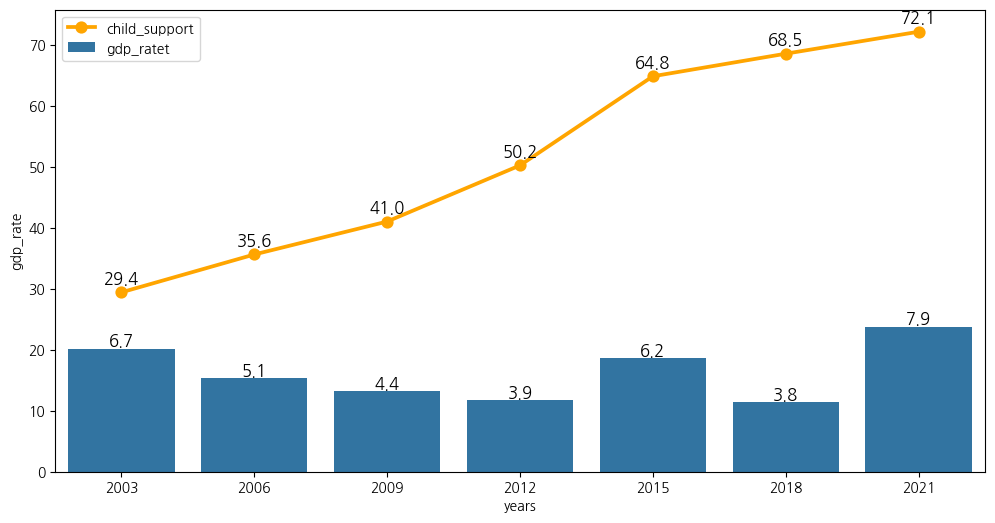

In [386]:

plt.figure(figsize=(12,6))
xdata =ecDF.index
ydata = ecDF['gdp_rate']*3
ydata2 = ecDF['child_support_per1']
ydata3 = cpiDF['total']
ydata4 = cpiDF['edu']

ax = sns.barplot(x=xdata, y=ydata, label='gdp_ratet')
sns.pointplot(x=xdata, y=ydata2,color='orange', label='child_support')
for x, y in enumerate(ecDF['gdp_rate']):
    plt.text(x, y*3, f'{y}', ha='center', va='bottom', fontsize=12, color='black')

for x, y in enumerate(ecDF['child_support_per1']):
    plt.text(x, y+1, f'{y}', ha='center', va='bottom', fontsize=12, color='black')

ax.legend()

# ax2 = ax.twinx()
# sns.pointplot(x=xdata, y=ydata3,color='red', label='소비자 물가지수')
# for x, y in enumerate(cpiDF['total']):
#     plt.text(x, y-2, f'{y:.1f}', ha='center', va='bottom', fontsize=12, color='black')

# sns.pointplot(x=xdata, y=ydata4,color='g', label='교육 물가지수')
# # for x, y in enumerate(cpiDF['edu']):
# #     plt.text(x, y+2, f'{y:.1f}', ha='center', va='bottom', fontsize=12, color='black')


# ax2.legend(loc = 'upper center')    
plt.show()

In [387]:
cur = conn.cursor(pymysql.cursors.DictCursor)
cur.execute('''
            select *
            from economy_idc_rate_r as e
                inner join both_working_r as bw
                on e.years = bw.years
                        
            ''')
rows = cur.fetchall() # 모든 데이터를 가져옴-> DataFrame 형태
ebwDF = pd.DataFrame(rows)

In [388]:
ebwDF.index=ebwDF['years']
ebwDF = ebwDF.drop(columns='years')

In [389]:
ebwDF

,gdp_rate,bw.years,total,both,both_rate,solo,solo_rate
years,,,,,,,
2015,6.2,2015,12143,5370,44.2,6773,55.8
2016,5.3,2016,12214,5535,45.3,6679,54.7
2017,5.5,2017,12289,5446,44.3,6843,55.7
2018,3.8,2018,12368,5684,46.0,6685,54.0
2019,1.7,2019,12472,5680,45.5,6792,54.5
2020,0.9,2020,12609,5675,45.0,6934,55.0
2021,7.9,2021,12687,5826,45.9,6861,54.1
2022,4.6,2022,12691,5846,46.1,6845,53.9
2023,3.3,2023,12687,6115,48.2,6572,51.8


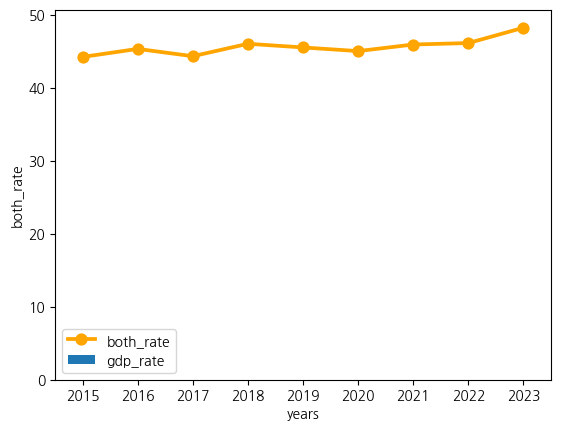

In [ ]:
fig, ax = plt.subplots()
xdata =ebwDF.index
ydata = ebwDF['gdp_rate']*4
ydata2 = ebwDF['both_rate']
ax.bar(x=xdata, height=ydata, label='gdp_rate')

ax2 = ax.twinx()
.pointplot(x=xdata, y=ydata2,color='orange',label='both_rate')


# for x, y in enumerate(ebwDF['gdp_rate']):
#     plt.text(x, y*4, f'{y:.1f}', ha='center', va='bottom', fontsize=12, color='black')


# for x, y in enumerate(ydata2):
#     plt.text(x, y, f'{y}', ha='center', va='bottom', fontsize=12, color='black')

plt.legend()
plt.show()

In [ ]:
cur = conn.cursor(pymysql.cursors.DictCursor)
cur.execute('''
            select *
            from economy_idc_rate_r as e
                inner join house_holding_r as h
                on e.years = h.years
                        
            ''')
rows = cur.fetchall() # 모든 데이터를 가져옴-> DataFrame 형태
ehDF = pd.DataFrame(rows)

In [ ]:
ehDF.index = ehDF.years
ehDF

,years,gdp_rate,h.years,1y,2y,3y,4y,5y
years,,,,,,,,
2015,2015,6.2,2015,137438,152111,170783,180732,187422
2016,2016,5.3,2016,132058,150014,166364,184189,194704
2017,2017,5.5,2017,118845,144080,163170,178554,197108
2018,2018,3.8,2018,114497,131188,157833,175279,192409
2019,2019,1.7,2019,101655,124581,140748,167375,186692
2020,2020,0.9,2020,90376,111539,134956,149263,177087
2021,2021,7.9,2021,81205,99948,121705,143466,157439
2022,2022,4.6,2022,81524,86427,104579,126342,149057
2023,2023,3.3,2023,93752,87535,92847,112785,135590


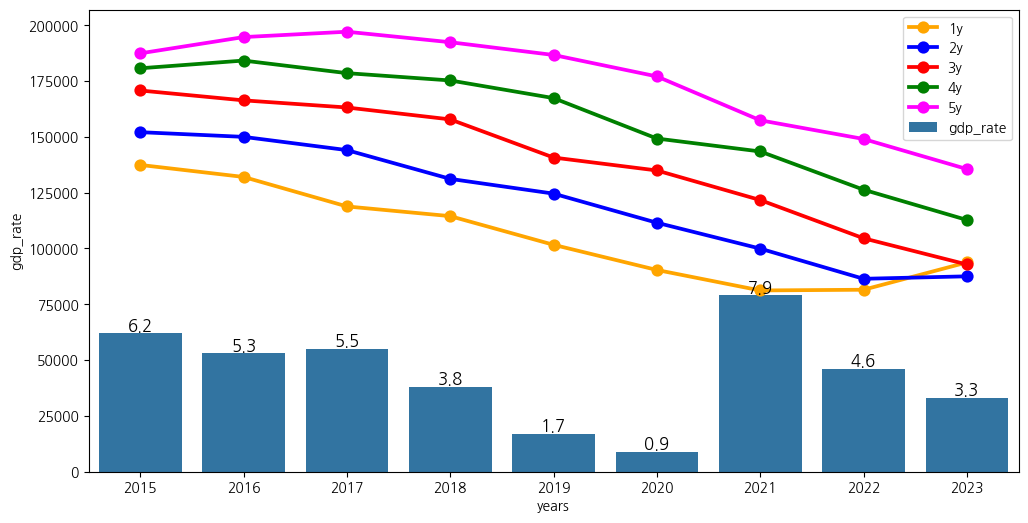

In [ ]:
plt.figure(figsize=(12,6))
xdata =ehDF.index
ydata = ehDF['gdp_rate']*10000
sns.regplot(x=xdata, y=ydata, scatter=False, color='blue', ax=plt.gca() )
ax = sns.barplot(x=xdata, y=ydata, label='gdp_rate')




ydata2 = ehDF['1y']
sns.pointplot(x=xdata, y=ydata2,color='orange',label='1y')

ydata3 = ehDF['2y']
sns.pointplot(x=xdata, y=ydata3,color='blue',label='2y')

ydata4 = ehDF['3y']
sns.pointplot(x=xdata, y=ydata4,color='red',label='3y')

ydata5 = ehDF['4y']
sns.pointplot(x=xdata, y=ydata5,color='green',label='4y')

ydata6 = ehDF['5y']
sns.pointplot(x=xdata, y=ydata6,color='magenta',label='5y')



for x, y in enumerate(ehDF['gdp_rate']):
    plt.text(x, y*10000, f'{y:.1f}', ha='center', va='bottom', fontsize=12, color='black')


# for x, y in enumerate(ydata2):
#     plt.text(x, y, f'{y}', ha='center', va='bottom', fontsize=12, color='black')

plt.legend()
plt.show()

In [ ]:
cur = conn.cursor(pymysql.cursors.DictCursor)
cur.execute('''
            select *
            from economy_idc_rate_r as e
                inner join birth_r as b
                on e.years = b.years
                        
            ''')
rows = cur.fetchall() # 모든 데이터를 가져옴-> DataFrame 형태
ebDF = pd.DataFrame(rows)

In [ ]:
ebDF.index = ebDF.years

In [ ]:
ebDF.index

Index([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023],
      dtype='int64', name='years')

In [ ]:
ebDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24 entries, 2000 to 2023
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   years             24 non-null     int64  
 1   gdp_rate          24 non-null     float64
 2   b.years           24 non-null     int64  
 3   total_birth_rate  24 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 960.0 bytes


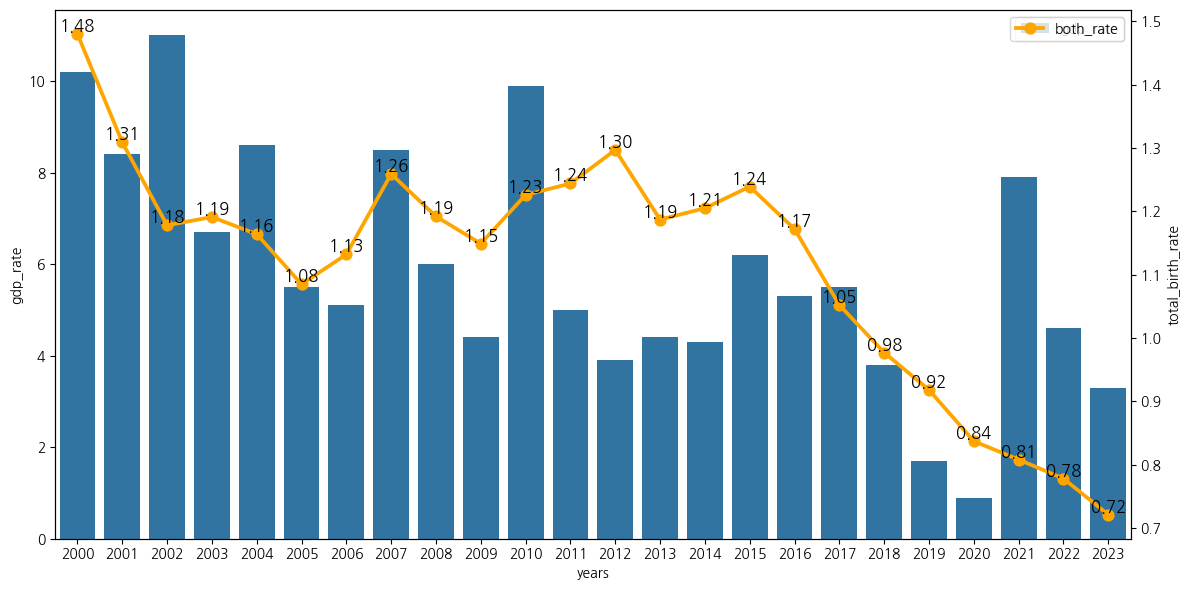

In [ ]:

fig, ax1 = plt.subplots(figsize=(12,6))
xdata =ebDF.index
ydata = ebDF['gdp_rate']
ydata2 = ebDF['total_birth_rate']

# sns.regplot(x=xdata, y=ydata, ax = ax1, scatter=False)
ax = sns.barplot(x=xdata, y=ydata, ax = ax1, label='gdp_rate')


ax2= ax1.twinx()
sns.pointplot(x=xdata, y=ydata2, ax = ax2, color='orange',label='both_rate')


# for x, y in enumerate(ebDF['gdp_rate']):
#     plt.text(x, y, f'{y:.1f}', ha='center', va='bottom', fontsize=12, color='black')


for x, y in enumerate(ydata2):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom', fontsize=12, color='black')

plt.tight_layout()
# plt.legend()
plt.show()

In [ ]:
cur = conn.cursor(pymysql.cursors.DictCursor)
cur.execute('''
            select * from second_period;                                 
            ''')
rows = cur.fetchall() # 모든 데이터를 가져옴-> DataFrame 형태
ebDF = pd.DataFrame(rows)

In [ ]:
ebDF.index = ebDF.years

In [ ]:
ebDF.loc[ebDF['category1'] == '전국', ['12under', '12~24', '24~36', '36~48', '48~60', '60plus']]

,12under,12~24,24~36,36~48,48~60,60plus
years,,,,,,
2015,15508,122169,115133,38511,12754,32269
2016,15512,117625,108638,36472,12296,31103
2017,15112,110789,99110,33069,11660,29478
2018,14163,100125,89532,31400,11157,27587
2019,13692,88906,80522,29987,10707,25691
2020,13084,78750,70470,27115,9864,23305
2021,12860,70801,62108,24516,9306,21211
2022,12917,64719,55395,22110,8691,19658
2023,12285,57968,48862,19716,8029,18073


In [ ]:
ebDF.loc[ebDF['category2'] == '맞벌이', ['12under', '12~24', '24~36', '36~48', '48~60', '60plus']]
ebDF.loc[ebDF['category2'] == '외벌이', ['12under', '12~24', '24~36', '36~48', '48~60', '60plus']]

,12under,12~24,24~36,36~48,48~60,60plus
years,,,,,,
2015,8391,67114,64467,20806,6660,17694
2016,8085,62481,58410,19323,6222,16669
2017,7794,58466,53513,17343,5838,15577
2018,7019,51395,46898,16070,5468,14153
2019,6723,44853,41217,15168,5211,12991
2020,6150,38825,34972,13267,4737,11558
2021,5775,33424,29560,11529,4295,10289
2022,5574,29740,25306,9993,3899,9186
2023,4914,25688,21830,8687,3606,8448


In [ ]:
ebDF.loc[ebDF['category2'] == '1건', ['12under', '12~24', '24~36', '36~48', '48~60', '60plus']]
ebDF.loc[ebDF['category2'] == '2건', ['12under', '12~24', '24~36', '36~48', '48~60', '60plus']]
ebDF.loc[ebDF['category2'] == '3건이상', ['12under', '12~24', '24~36', '36~48', '48~60', '60plus']]

,12under,12~24,24~36,36~48,48~60,60plus
years,,,,,,
2015,329,2819,2751,1100,463,972
2016,349,2852,2808,1119,480,1045
2017,355,2874,2811,1104,497,989
2018,368,2613,2578,1057,482,964
2019,310,2358,2340,1009,481,903
2020,282,2050,2079,868,427,792
2021,258,1673,1677,742,339,626
2022,237,1420,1506,642,317,557
2023,231,1401,1397,634,292,514


In [ ]:
reDF = ebDF.loc[ebDF['category1'] == '전국', ['12under', '12~24', '24~36', '36~48', '48~60', '60plus']]

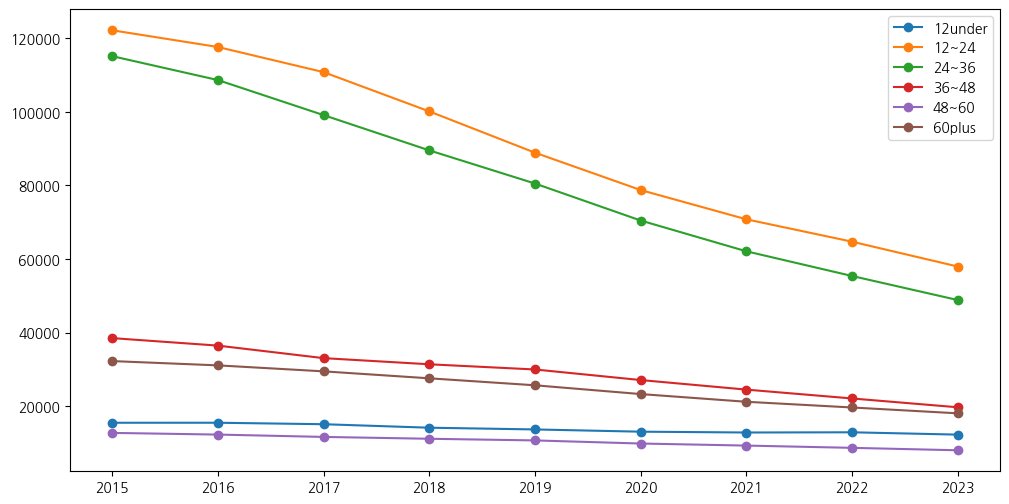

In [ ]:
x = reDF.index  
y1 = reDF['12under'] 
y2 = reDF['12~24'] 
y3 = reDF['24~36'] 
y4 = reDF['36~48'] 
y5 = reDF['48~60'] 
y6 = reDF['60plus'] 

fig, ax = plt.subplots(figsize=(12, 6))

colors = sns.color_palette("Set2") 

ax.plot(x, y1, linestyle='-', marker='o', label="12under")
ax.plot(x, y2, linestyle='-', marker='o', label="12~24")
ax.plot(x, y3, linestyle='-', marker='o', label="24~36")
ax.plot(x, y4, linestyle='-', marker='o', label="36~48")
ax.plot(x, y5, linestyle='-', marker='o', label="48~60")
ax.plot(x, y6, linestyle='-', marker='o', label="60plus")

plt.legend()
plt.show()


In [ ]:
botDF1 = ebDF.loc[ebDF['category2'] == '맞벌이', ['12under', '12~24', '24~36', '36~48', '48~60', '60plus']]
botDF2 = ebDF.loc[ebDF['category2'] == '외벌이', ['12under', '12~24', '24~36', '36~48', '48~60', '60plus']]

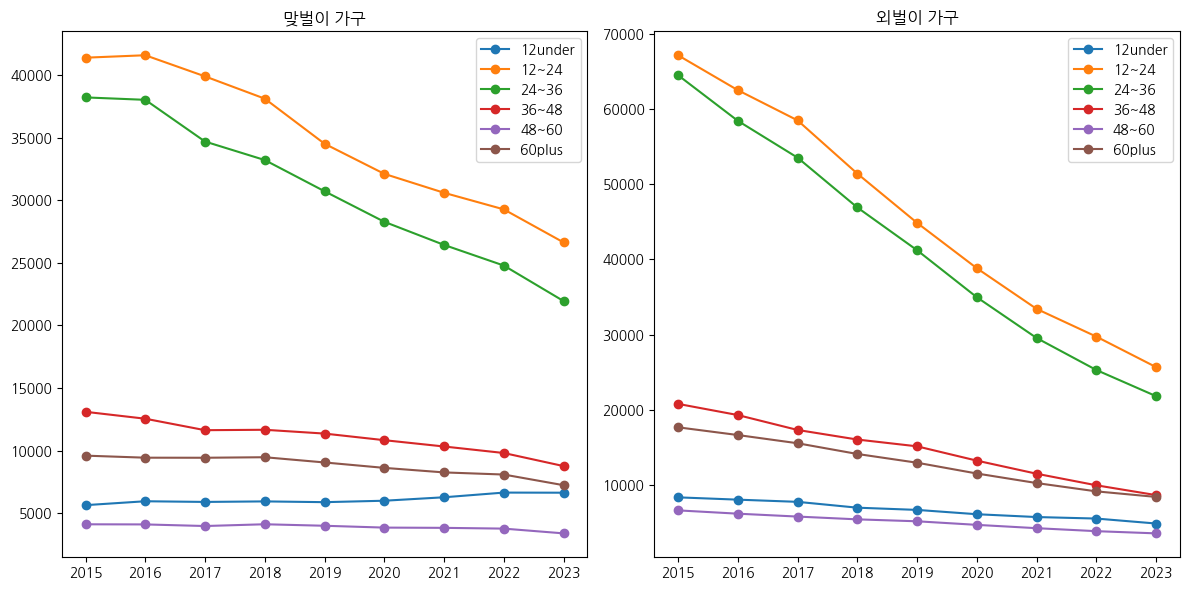

In [ ]:
x = botDF1.index  
y1 = botDF1['12under'] 
y2 = botDF1['12~24'] 
y3 = botDF1['24~36'] 
y4 = botDF1['36~48'] 
y5 = botDF1['48~60'] 
y6 = botDF1['60plus'] 

fig, ax = plt.subplots(1,2,figsize=(12, 6))

colors = sns.color_palette("Set2") 

ax[0].plot(x, y1, linestyle='-', marker='o', label="12under")
ax[0].plot(x, y2, linestyle='-', marker='o', label="12~24")
ax[0].plot(x, y3, linestyle='-', marker='o', label="24~36")
ax[0].plot(x, y4, linestyle='-', marker='o', label="36~48")
ax[0].plot(x, y5, linestyle='-', marker='o', label="48~60")
ax[0].plot(x, y6, linestyle='-', marker='o', label="60plus")

ax[0].set_title("맞벌이 가구")
# ax[0].set_xlabel("Date")
# ax[0].set_ylabel("Values")
ax[0].legend()



x = botDF2.index  
y1 = botDF2['12under'] 
y2 = botDF2['12~24'] 
y3 = botDF2['24~36'] 
y4 = botDF2['36~48'] 
y5 = botDF2['48~60'] 
y6 = botDF2['60plus'] 

colors = sns.color_palette("Set2") 

ax[1].plot(x, y1, linestyle='-', marker='o', label="12under")
ax[1].plot(x, y2, linestyle='-', marker='o', label="12~24")
ax[1].plot(x, y3, linestyle='-', marker='o', label="24~36")
ax[1].plot(x, y4, linestyle='-', marker='o', label="36~48")
ax[1].plot(x, y5, linestyle='-', marker='o', label="48~60")
ax[1].plot(x, y6, linestyle='-', marker='o', label="60plus")

ax[1].set_title("외벌이 가구")
# ax[1].set_xlabel("Date")
# ax[1].set_ylabel("Values")
ax[1].legend()

plt.tight_layout()

plt.show()


In [ ]:
ebDF.category2.values

array(['소계', '소계', '소계', '소계', '소계', '소계', '소계', '소계', '소계', '맞벌이', '맞벌이',
       '맞벌이', '맞벌이', '맞벌이', '맞벌이', '맞벌이', '맞벌이', '맞벌이', '외벌이', '외벌이',
       '외벌이', '외벌이', '외벌이', '외벌이', '외벌이', '외벌이', '외벌이', '기타', '기타', '기타',
       '기타', '기타', '기타', '기타', '기타', '기타', '주택 미소유', '주택 미소유', '주택 미소유',
       '주택 미소유', '주택 미소유', '주택 미소유', '주택 미소유', '주택 미소유', '주택 미소유',
       '주택 소유(소계)', '주택 소유(소계)', '주택 소유(소계)', '주택 소유(소계)', '주택 소유(소계)',
       '주택 소유(소계)', '주택 소유(소계)', '주택 소유(소계)', '주택 소유(소계)', '1건', '1건',
       '1건', '1건', '1건', '1건', '1건', '1건', '1건', '2건', '2건', '2건', '2건',
       '2건', '2건', '2건', '2건', '2건', '3건이상', '3건이상', '3건이상', '3건이상',
       '3건이상', '3건이상', '3건이상', '3건이상', '3건이상'], dtype=object)

In [ ]:
hoDF1 = ebDF.loc[ebDF['category2'] == '주택 미소유', ['12under', '12~24', '24~36', '36~48', '48~60', '60plus']]
hoDF2 = ebDF.loc[ebDF['category2'] == '1건', ['12under', '12~24', '24~36', '36~48', '48~60', '60plus']]
hoDF3 = ebDF.loc[ebDF['category2'] == '2건', ['12under', '12~24', '24~36', '36~48', '48~60', '60plus']]
hoDF4 = ebDF.loc[ebDF['category2'] == '3건이상', ['12under', '12~24', '24~36', '36~48', '48~60', '60plus']]

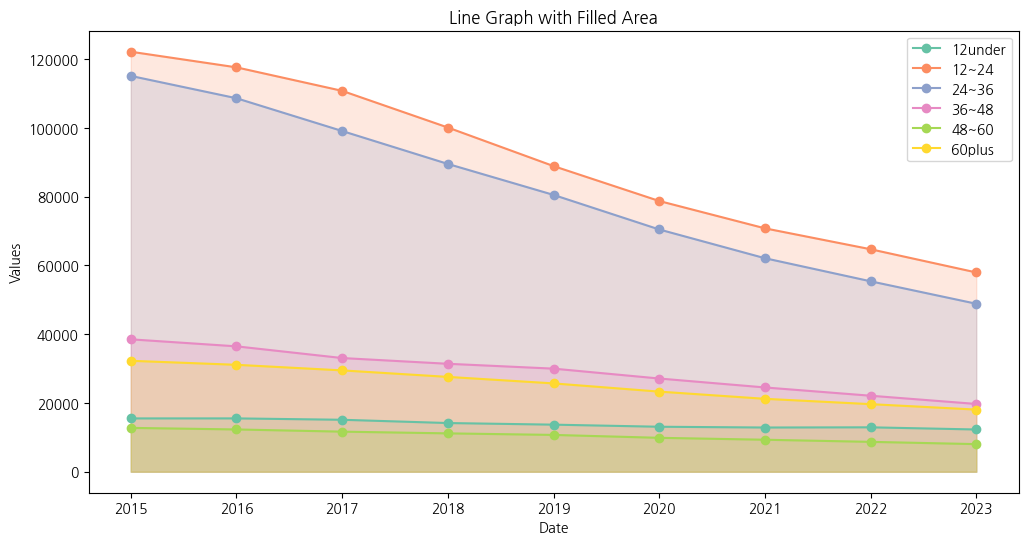

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# X축과 Y축 데이터 설정
x = reDF.index  
y1 = reDF['12under'] 
y2 = reDF['12~24'] 
y3 = reDF['24~36'] 
y4 = reDF['36~48'] 
y5 = reDF['48~60'] 
y6 = reDF['60plus'] 

# 그래프 생성
fig, ax = plt.subplots(figsize=(12, 6))

# 색상 설정 (Seaborn 팔레트)
colors = sns.color_palette("Set2")

# 🔹 줄 그래프 (라인)
ax.plot(x, y1, color=colors[0], linestyle='-', marker='o', label="12under")
ax.plot(x, y2, color=colors[1], linestyle='-', marker='o', label="12~24")
ax.plot(x, y3, color=colors[2], linestyle='-', marker='o', label="24~36")
ax.plot(x, y4, color=colors[3], linestyle='-', marker='o', label="36~48")
ax.plot(x, y5, color=colors[4], linestyle='-', marker='o', label="48~60")
ax.plot(x, y6, color=colors[5], linestyle='-', marker='o', label="60plus")

# 🔹 `fill_between()`으로 영역 색칠
ax.fill_between(x, y1, alpha=0.2, color=colors[0])
ax.fill_between(x, y2, alpha=0.2, color=colors[1])
ax.fill_between(x, y3, alpha=0.2, color=colors[2])
ax.fill_between(x, y4, alpha=0.2, color=colors[3])
ax.fill_between(x, y5, alpha=0.2, color=colors[4])
ax.fill_between(x, y6, alpha=0.2, color=colors[5])

# 그래프 설정
ax.set_xlabel("Date")
ax.set_ylabel("Values")
ax.set_title("Line Graph with Filled Area")
ax.legend()

plt.show()


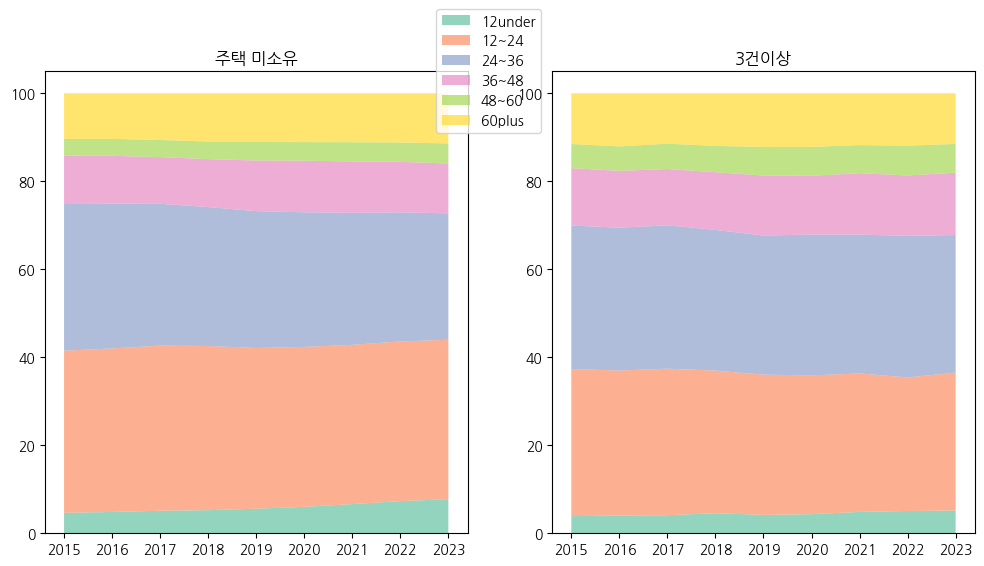

In [ ]:
x = hoDF1.index  
y1 = hoDF1['12under'] 
y2 = hoDF1['12~24'] 
y3 = hoDF1['24~36'] 
y4 = hoDF1['36~48'] 
y5 = hoDF1['48~60'] 
y6 = hoDF1['60plus'] 

df_percent = hoDF1.div(hoDF1.sum(axis=1), axis=0) * 100

colors = sns.color_palette("Set2")

fig, ax = plt.subplots(1,2,figsize=(12, 6))

ax[0].stackplot(df_percent.index, df_percent.T, labels=df_percent.columns, colors=colors, alpha=0.7)
ax[0].set_title('주택 미소유')
ax[0].legend(loc="center", bbox_to_anchor=(1.05, 1), borderaxespad=0.)

x = hoDF4.index  
y1 = hoDF4['12under'] 
y2 = hoDF4['12~24'] 
y3 = hoDF4['24~36'] 
y4 = hoDF4['36~48'] 
y5 = hoDF4['48~60'] 
y6 = hoDF4['60plus'] 

df_percent = hoDF4.div(hoDF4.sum(axis=1), axis=0) * 100
ax[1].stackplot(df_percent.index, df_percent.T, labels=df_percent.columns, colors=colors, alpha=0.7)
ax[1].set_title("3건이상")


plt.show()


In [ ]:
hoDF1

,12under,12~24,24~36,36~48,48~60,60plus
years,,,,,,
2015,7864,62258,56324,18568,6468,17498
2016,7735,59283,52456,17397,6130,16533
2017,7474,54740,46990,15480,5680,15474
2018,6922,49191,41621,14369,5281,14440
2019,6663,43621,37123,13749,5026,13219
2020,6433,38911,32754,12549,4524,11881
2021,6430,35116,29116,11327,4240,10787
2022,6551,32522,26267,10291,3941,10021
2023,6105,28550,22648,8923,3604,8977


In [ ]:
exDF = hoDF1.iloc[:,:3:]
exDF2 = hoDF2.iloc[:,:3:]
exDF3 = hoDF3.iloc[:,:3:]

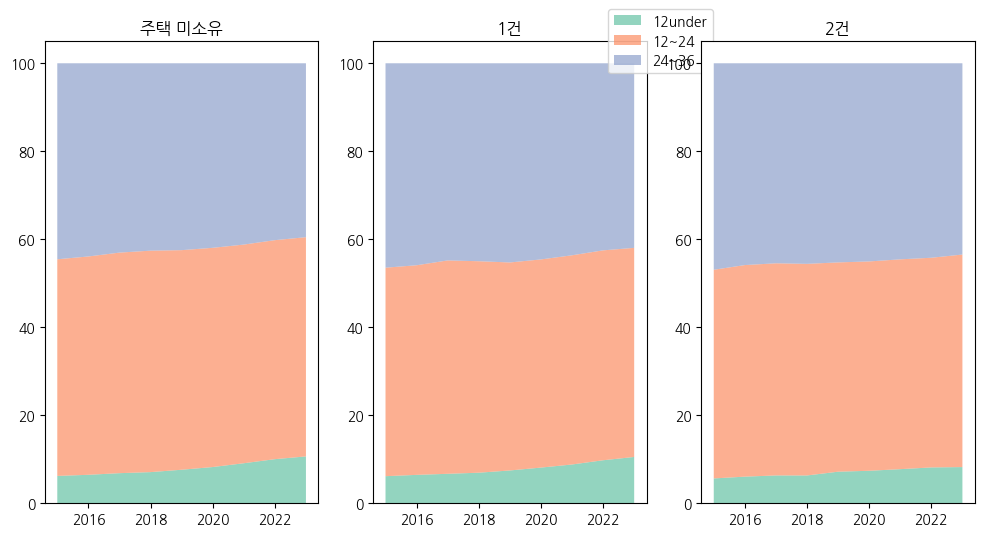

In [ ]:
# x = hoDF1.index  
# y1 = hoDF1['12under'] 
# y2 = hoDF1['12~24'] 


df_percent = exDF.div(exDF.sum(axis=1), axis=0) * 100

colors = sns.color_palette("Set2")

fig, ax = plt.subplots(1,3,figsize=(12, 6))

ax[0].stackplot(df_percent.index, df_percent.T, labels=df_percent.columns, colors=colors, alpha=0.7)
ax[0].set_title('주택 미소유')


# x = hoDF3.index  
# y1 = hoDF2['12under'] 
# y2 = hoDF2['12~24'] 


df_percent = exDF2.div(exDF2.sum(axis=1), axis=0) * 100
ax[1].stackplot(df_percent.index, df_percent.T, labels=df_percent.columns, colors=colors, alpha=0.7)
ax[1].set_title("1건")
ax[1].legend(loc="center", bbox_to_anchor=(1.05, 1), borderaxespad=0.)

df_percent = exDF3.div(exDF3.sum(axis=1), axis=0) * 100
ax[2].stackplot(df_percent.index, df_percent.T, labels=df_percent.columns, colors=colors, alpha=0.7)
ax[2].set_title("2건")



plt.show()


In [ ]:
cur = conn.cursor(pymysql.cursors.DictCursor)
cur.execute('''
            select * from region_couple_total;                                 
            ''')
rows = cur.fetchall() # 모든 데이터를 가져옴-> DataFrame 형태
ebDF = pd.DataFrame(rows)

In [ ]:
ebDF.index = ebDF['years']

In [ ]:
entireDF = ebDF.loc[ebDF['region']=='전국']

In [ ]:
entireDF

,region,years,count_couple,count_both,rate_both,count_housholding_couple,rate_householding,count_house,avg_householde,avg_birth
years,,,,,,,,,,
2015,전국,2015,1471647,595850,40.5,640709,43.5,828486,1.3,0.93
2016,전국,2016,1436948,603281,42.0,633642,44.1,827329,1.3,0.92
2017,전국,2017,1379766,585957,42.5,616621,44.7,801757,1.3,0.91
2018,전국,2018,1322406,594409,44.9,594721,45.0,771206,1.3,0.87
2019,전국,2019,1260117,582985,46.3,557592,44.2,721051,1.3,0.84
2020,전국,2020,1183750,580089,49.0,516481,43.6,663221,1.3,0.81
2021,전국,2021,1101455,569472,51.7,479791,43.6,603763,1.3,0.80
2022,전국,2022,1032253,555743,53.8,437452,42.4,547929,1.3,0.79
2023,전국,2023,974452,529627,54.4,417548,42.8,522509,1.3,0.77


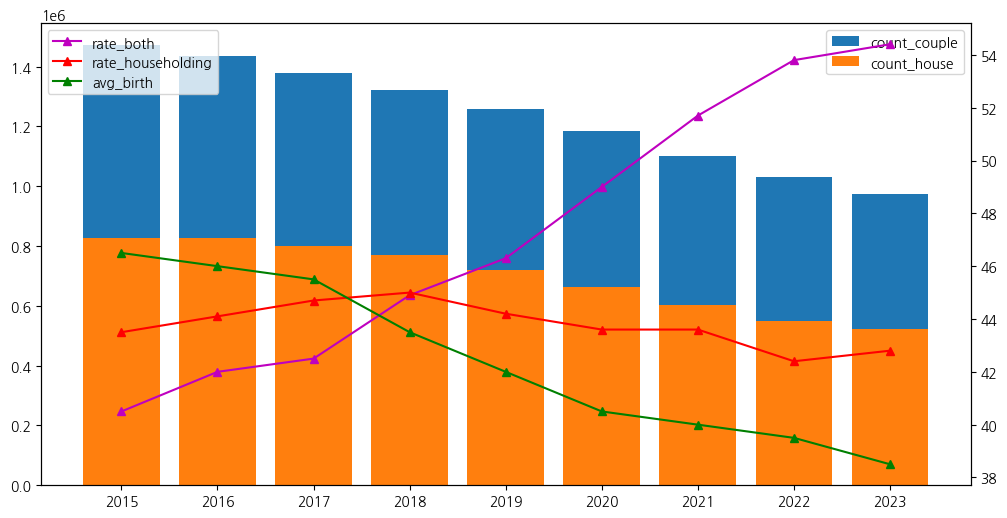

In [ ]:
x = entireDF.index  
y1 = entireDF['count_couple']
y2 = entireDF['rate_both']
y3 = entireDF['rate_householding']
y4 = entireDF['count_house']
y5 = entireDF['avg_birth']


fig, ax = plt.subplots(figsize=(12, 6))

colors = sns.color_palette("Set2") 

ax.bar(x, y1, label="count_couple")

ax.bar(x, y4, label="count_house")
ax.legend()

ax2 = ax.twinx()

ax2.plot(x, y2, color='m', linestyle='-', marker='^', label="rate_both")
ax2.plot(x, y3, color='r', linestyle='-', marker='^', label="rate_householding")
ax2.plot(x, y5*50, color='g', linestyle='-', marker='^', label="avg_birth")
ax2.legend()
# ax.set_xticks(xdata.index)  # x축의 눈금을 5 간격으로 설정
# ax.set_xticklabels([str(x[i]) for i in range(0, len(x), 1)], rotation=45)  # 레이블을 45도 회전하여 표시
plt.xticks(xdata[15:])
plt.show()


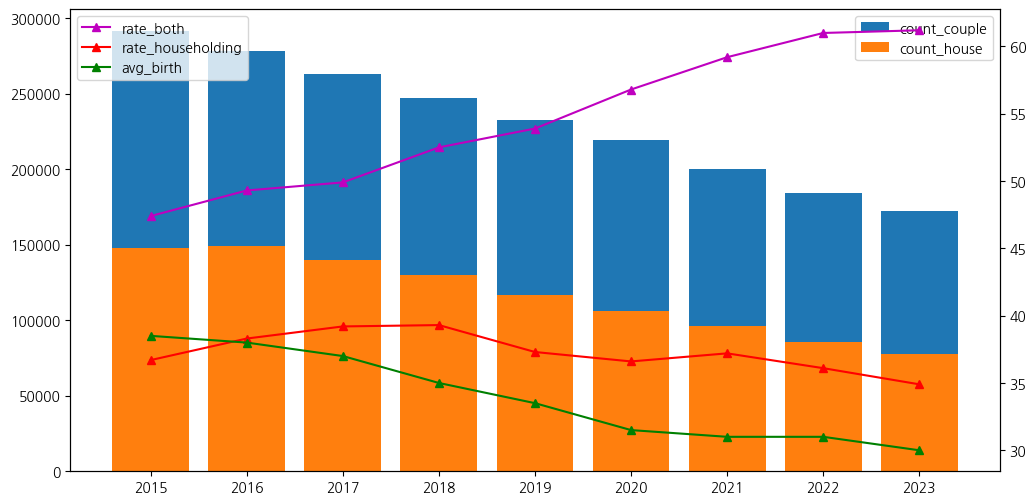

In [ ]:
seDF = ebDF.loc[ebDF['region']=='서울특별시']
x = seDF.index  
y1 = seDF['count_couple']
y2 = seDF['rate_both']
y3 = seDF['rate_householding']
y4 = seDF['count_house']
y5 = seDF['avg_birth']


fig, ax = plt.subplots(figsize=(12, 6))

colors = sns.color_palette("Set2") 

ax.bar(x, y1, label="count_couple")

ax.bar(x, y4, label="count_house")
ax.legend()

ax2 = ax.twinx()

ax2.plot(x, y2, color='m', linestyle='-', marker='^', label="rate_both")
ax2.plot(x, y3, color='r', linestyle='-', marker='^', label="rate_householding")
ax2.plot(x, y5*50, color='g', linestyle='-', marker='^', label="avg_birth")
ax2.legend()
# ax.set_xticks(xdata.index)  # x축의 눈금을 5 간격으로 설정
# ax.set_xticklabels([str(x[i]) for i in range(0, len(x), 1)], rotation=45)  # 레이블을 45도 회전하여 표시
plt.xticks(xdata[15:])
plt.show()

In [ ]:
bsDF = ebDF.loc[ebDF['region']=='부산광역시']

In [ ]:
bsDF

,region,years,count_couple,count_both,rate_both,count_housholding_couple,rate_householding,count_house,avg_householde,avg_birth
years,,,,,,,,,,
2015,부산광역시,2015,90578,35759,39.5,43966,48.5,58227,1.3,0.93
2016,부산광역시,2016,88339,35769,40.5,43465,49.2,57266,1.3,0.92
2017,부산광역시,2017,83545,33953,40.6,41235,49.4,55268,1.3,0.91
2018,부산광역시,2018,77755,33632,43.3,37101,47.7,50000,1.4,0.88
2019,부산광역시,2019,72403,32413,44.8,32495,44.9,43629,1.3,0.84
2020,부산광역시,2020,67632,32299,47.8,29180,43.1,39052,1.3,0.81
2021,부산광역시,2021,62431,31683,50.7,26694,42.8,35210,1.3,0.79
2022,부산광역시,2022,58215,30855,53.0,24147,41.5,31330,1.3,0.78
2023,부산광역시,2023,54388,29393,54.0,23323,42.9,30117,1.3,0.77


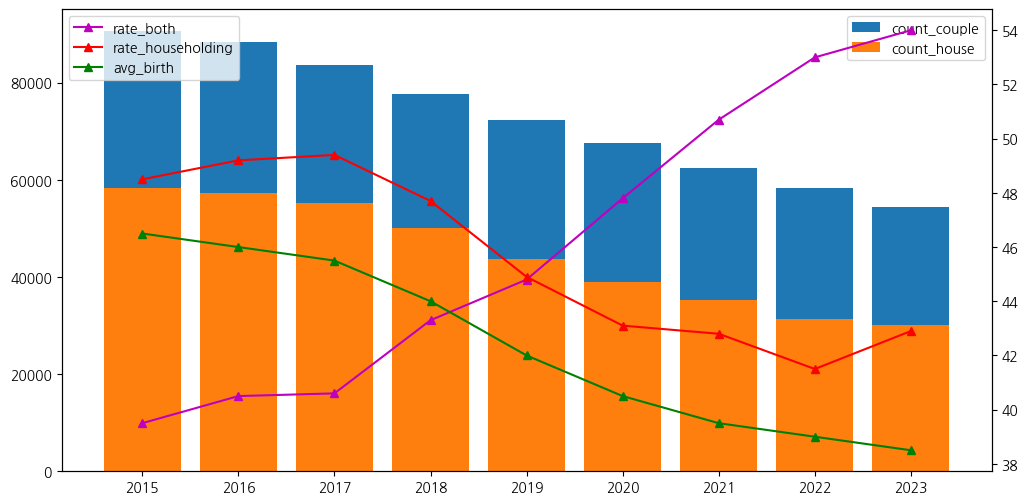

In [ ]:
x = bsDF.index  
y1 = bsDF['count_couple']
y2 = bsDF['rate_both']
y3 = bsDF['rate_householding']
y4 = bsDF['count_house']
y5 = bsDF['avg_birth']


fig, ax = plt.subplots(figsize=(12, 6))

colors = sns.color_palette("Set2") 

ax.bar(x, y1, label="count_couple")

ax.bar(x, y4, label="count_house")
ax.legend()

ax2 = ax.twinx()

ax2.plot(x, y2, color='m', linestyle='-', marker='^', label="rate_both")
ax2.plot(x, y3, color='r', linestyle='-', marker='^', label="rate_householding")
ax2.plot(x, y5*50, color='g', linestyle='-', marker='^', label="avg_birth")
ax2.legend()
# ax.set_xticks(xdata.index)  # x축의 눈금을 5 간격으로 설정
# ax.set_xticklabels([str(x[i]) for i in range(0, len(x), 1)], rotation=45)  # 레이블을 45도 회전하여 표시
plt.xticks(xdata[15:])
plt.show()

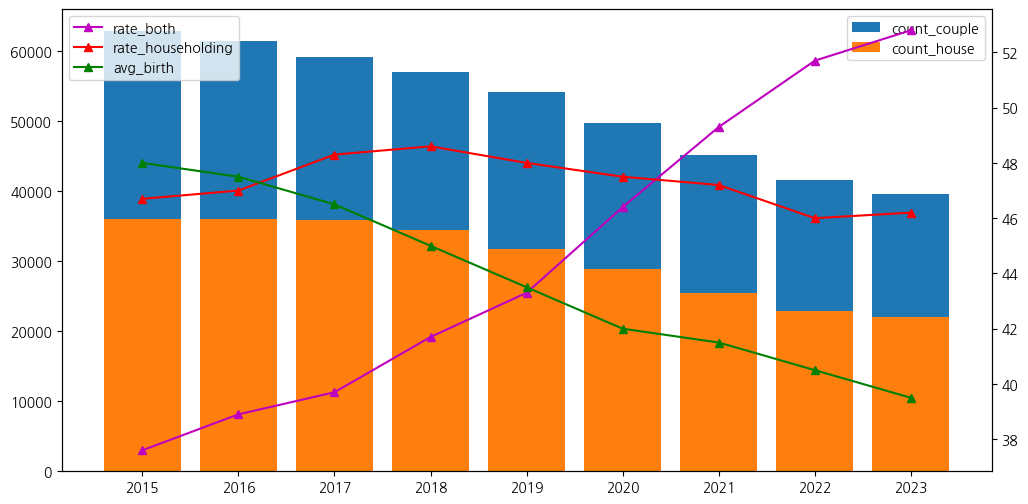

In [ ]:
dgDF = ebDF.loc[ebDF['region']=='대구광역시']
x = dgDF.index  
y1 = dgDF['count_couple']
y2 = dgDF['rate_both']
y3 = dgDF['rate_householding']
y4 = dgDF['count_house']
y5 = dgDF['avg_birth']


fig, ax = plt.subplots(figsize=(12, 6))

colors = sns.color_palette("Set2") 

ax.bar(x, y1, label="count_couple")

ax.bar(x, y4, label="count_house")
ax.legend()

ax2 = ax.twinx()

ax2.plot(x, y2, color='m', linestyle='-', marker='^', label="rate_both")
ax2.plot(x, y3, color='r', linestyle='-', marker='^', label="rate_householding")
ax2.plot(x, y5*50, color='g', linestyle='-', marker='^', label="avg_birth")
ax2.legend()
# ax.set_xticks(xdata.index)  # x축의 눈금을 5 간격으로 설정
# ax.set_xticklabels([str(x[i]) for i in range(0, len(x), 1)], rotation=45)  # 레이블을 45도 회전하여 표시
plt.xticks(xdata[15:])
plt.show()